# Module 18 - Neural Networks

## Learning outcomes

- LO 1: Explain the architecture of a neural network.
- LO 2: Use the gradient descent algorithm and the backpropagation technique.
- LO 3: Determine when deep learning is a feasible/realistic solution for a data-based problem.
- LO 4: Develop a neural network using the basic building blocks.
- LO 5: Refine a codebase for machine learning competitions.

## Misc and Keywords
- Total parameters of a NN can be calculated as $\text{Total Parameters=(Number of Inputs)×(Number of Neurons)+(Number of Neurons)}$
- Number of parameters for a single layer can be calculated as $\text{Number of Weights=(Number of Inputs)×(Number of Neurons)}$
- **Input layer**: The layer that receives the input data. It is visible to the user.
- **Hidden layer**: A layer between the input and output layers. It performs intermediate computations and is not directly observed.
- **Output layer**: The final layer that produces the network’s prediction. It is visible to the user.
- **Weight**: A parameter that connects two neurons. It determines the strength and direction of the connection.
- **Bias**: An additional parameter added to the weighted sum before applying the activation function. It allows the model to better fit the data.
- **Activation function**: A function applied to the output of a layer (such as ReLU, sigmoid, or tanh) to introduce non-linearity into the model.
- **Fully connected layer (Dense layer)**: A layer where each neuron is connected to every neuron in the previous layer.
- **Forward pass**: The process of calculating the output of the network by moving data through each layer.
- **Loss function**: A function that measures how far the network’s prediction is from the true output (e.g., Mean Squared Error, Cross-Entropy).
- **Backward pass (Backpropagation)**: The algorithm used to update the network's weights by computing gradients of the loss with respect to each weight.
- **Learning rate**: A hyperparameter that controls how much the weights are adjusted during training.
- **Epoch**: One full pass over the entire training dataset.
- **Batch size**: The number of training examples used in one update of the model’s weights.
- **Optimiser**: An algorithm (like SGD, Adam) that adjusts the weights based on the gradients to minimise the loss function.
- **Derivative:** Rate of change of a function with one variable.
- **Partial Derivative:** Rate of change of a function with many variables, focusing on one variable at a time.


## Activiation Functions:

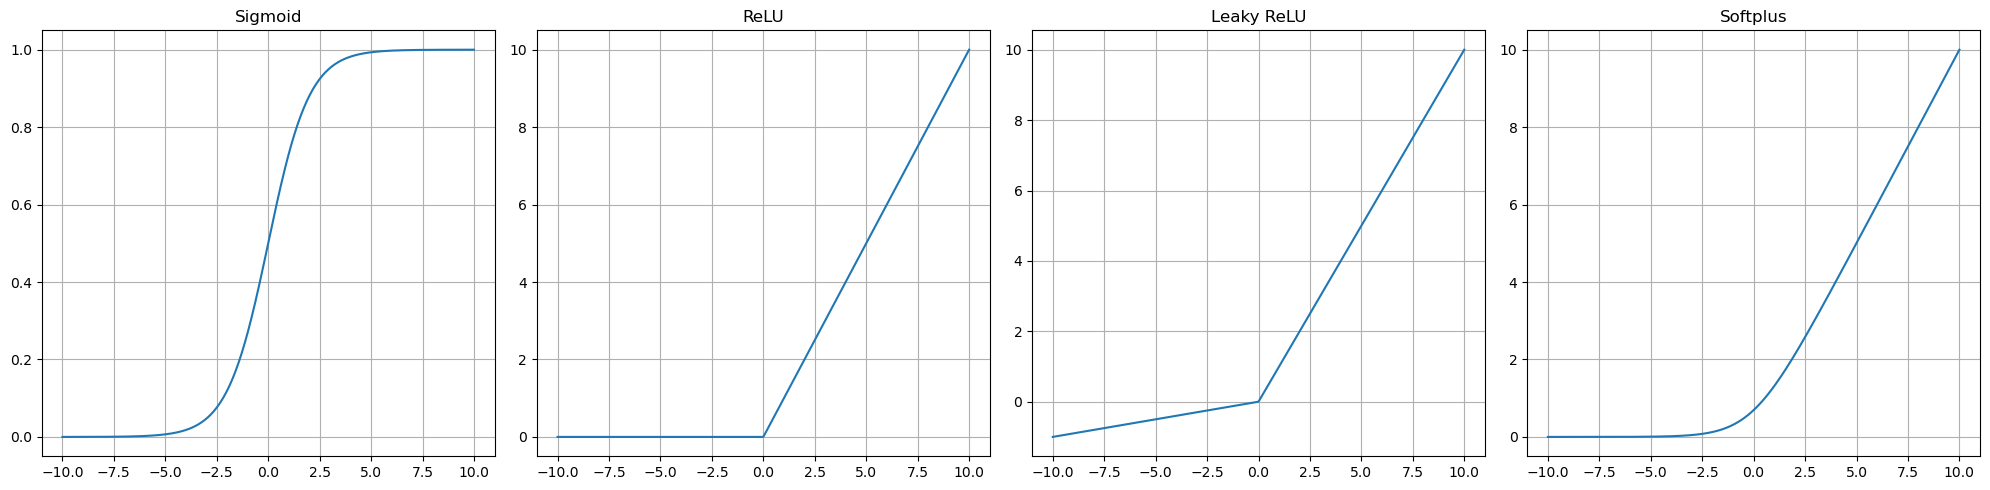

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Define your functions
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z):
    return 0.1 * z + 0.9 * np.maximum(0, z)

def softplus(z):
    return np.log(1 + np.exp(z))

# Create the input values
z = np.linspace(-10, 10, 400)

# Create subplots: 1 row, 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot each activation function
axes[0].plot(z, sigmoid(z))
axes[0].set_title('Sigmoid')

axes[1].plot(z, relu(z))
axes[1].set_title('ReLU')

axes[2].plot(z, leaky_relu(z))
axes[2].set_title('Leaky ReLU')

axes[3].plot(z, softplus(z))
axes[3].set_title('Softplus')

# Optional: Set grid and tight layout
for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()


## Module Summary Description

---

# Neural Networks and Function Approximation

## What is Function Approximation?

**Function approximation** is about finding a simpler or more convenient function that is *close enough* to another function. 

There are two typical cases:
- **Unknown function**: You only have data points (inputs and outputs), and you try to build a model that captures the relationship.
- **Complicated known function**: Even if the function is known (like $f(x) = \sin(x)$), you might want an easier version (like a Taylor series) to make computations faster.

In both cases, the goal is to find a function $\hat{f}(x)$ such that:

$$
\hat{f}(x) \approx f(x)
$$

## How Neural Networks Fit In

Neural networks are **function approximators**.

Their main job is:
- Take an input $x$,
- Produce an output $\hat{y}$,
- In a way that approximates the true output $y$ (which comes from an unknown or complicated function $f(x)$).

In other words, a neural network **learns to model the relationship** between input and output:

$$
\hat{f}(x) \approx f(x)
$$

over the data points we provide.

## Why Neural Networks Are Good at Approximation

- Neural networks can **approximate very complex, non-linear functions**.
- With enough neurons and layers, they can approximate **almost any function**. (This is known as the **Universal Approximation Theorem**.)
- They **learn** the function shape from data — you don't have to manually specify the type of function.

## A Simple Example

Suppose you have a dataset:

| Hours Studied ($x$) | Test Score ($y$) |
|:---:|:---:|
| 1 | 50 |
| 2 | 55 |
| 3 | 65 |
| 4 | 70 |
| 5 | 85 |

You don't know the real function mapping $x$ to $y$.

You train a neural network with this data, and after training, the network outputs $\hat{y}$ values close to the true $y$ values.

Thus, it has learned an **approximate function** $\hat{f}(x)$, which you can now use to predict scores for new, unseen study times.

---

# Simple Neural Network: Layers and Transformations

1. The network has three inputs, and that vector is denoted by **$x \in \mathbb{R}^3$**.
2. Those three inputs get transformed by a linear transformation 
represented by a **$3 \times 4$ matrix $W_1$**:    
    - Each entry in this matrix $W_1$ is a **weight** — a parameter to be learned.
    - You can also count weights by counting the number of **connections between the units** in the first layer (input) and in the second layer (hidden layer).
3. To the vector $W_1x$ we add a **bias vector $b_1 \in \mathbb{R}^4$**, and then pass the resulting vector through a **ReLU transformation $\text{ReLU}(\cdot)$**.
    - Each entry in the vector $b_1$ is also a **weight** (specifically, a bias term).
4. Finally, apply a second linear transformation represented by a **$4 \times 1$ matrix $W_2$**, and again, each entry in this second matrix is a weight to be determined. The final output is a single number (scalar).

The Total parameters of a NN can be calculated as $\text{Total Parameters=(Number of Inputs)×(Number of Neurons)+(Number of Neurons)}$ and number of parameters for a single layer can be calculated as $\text{Number of Weights=(Number of Inputs)×(Number of Neurons)}$

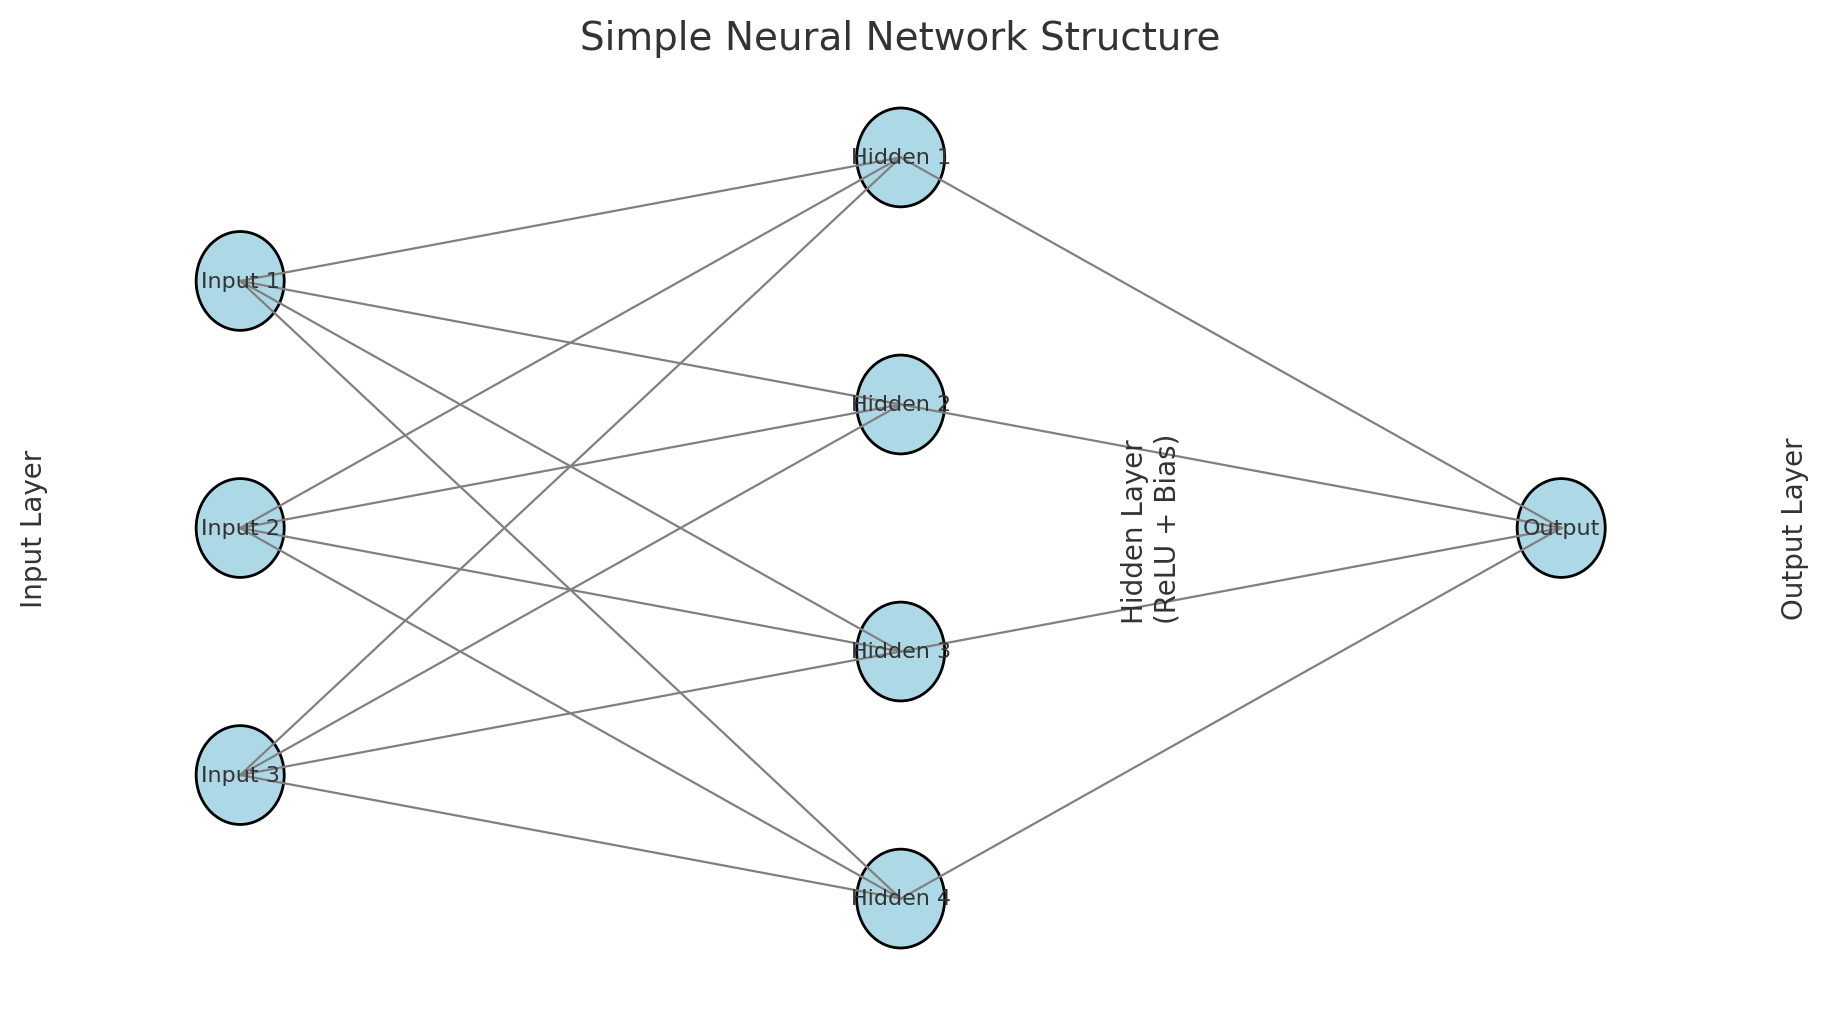

---

# Function Composition for the Neural Network

Given the network structure:

- Input vector: $x \in \mathbb{R}^3$
- First weight matrix: $W_1 \in \mathbb{R}^{4 \times 3}$
- First bias vector: $b_1 \in \mathbb{R}^4$
- Activation function: $\sigma(\cdot)$ (assumed ReLU, but could be any activation)
- Second weight matrix: $W_2 \in \mathbb{R}^{1 \times 4}$
- Second bias: $b_2 \in \mathbb{R}$

The full function computed by the network is:

$$
f(x) = W_2 \, \sigma(W_1x + b_1) + b_2
$$

## Identifying Each Term

- **$W_1x$**: Linear transformation of the input vector.

- **$W_1x + b_1$**: Adds a bias to each neuron in the hidden layer.

- **$\sigma(W_1x + b_1)$**: Applies a nonlinear activation function (e.g., ReLU) elementwise.

- **$W_2 \, \sigma(W_1x + b_1)$**: Maps the activated hidden layer output to a single scalar.

- **$W_2 \, \sigma(W_1x + b_1) + b_2$**: Adds a final bias to produce the network’s output.

# Short Summary

The network performs the following sequence of transformations:

1. **Linear transform**: $W_1x$
2. **Add bias**: $+ b_1$
3. **Apply activation**: $\sigma(\cdot)$
4. **Linear transform**: $W_2 \cdot (\cdot)$
5. **Add final bias**: $+ b_2$

---

# Implementing a NN

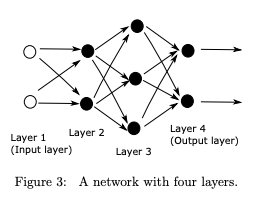

In [135]:
from __future__ import print_function
import torch

import torch.nn as nn 
import torch.nn.functional as func 

# input
x = torch.from_numpy(np.array([1., 2.], dtype=np.float64)).float() #use numpy commands -- example input to Layer 2

# in PyTorch we have to start defining the linear functions of each layer
F_1 = nn.Linear(in_features=2, out_features=2, bias=True) #bias = True adds the bias term for input - layer 1 weights
#print('A_2:', F_1.weight, '\n', 'b_2:', F_1.bias) #weights are assigned randomly

L_2 = nn.Linear(in_features=2, out_features=3, bias=True) #define the second step -> 2 - to 3 + the bias term 
F_2 = lambda x: func.relu(L_2.forward(x)) # F_2 applies the ReLU activation on the L_2 evaluation.

L_3 = nn.Linear(in_features=3, out_features=2, bias=True)
F_3 = lambda x: L_3.forward(x) #this is just evaluation, here we do not apply ReLU (or this is "identity activation")

# Now, to make prediction, we can simply compose the layers:
F = lambda x: F_3(F_2(F_1(x)))

# And finally giving an input to F will return an output:
x = torch.from_numpy(np.array([1., 2.], dtype=np.float64)).float()
y = F(x)
y

tensor([ 0.2290, -0.1967], grad_fn=<ViewBackward0>)

---

# Gradient Desecent

*When you dissected your first neural network, you learned that the weights of each connection between the computing units are weights to be determined. The way you can determine those weights is by setting up an optimisation problem where the objective function to be minimised is the loss function.*

*The loss function can take various shapes – the most common ones are the sum-of-squares error (which you have seen in econometrics) and cross entropy. Both are used in this module.*

If you have data $D = \{(x_i, y_i), i = 1, \ldots, m\}$ consisting of pairs of inputs and outputs, let $\hat{y} = F(x, w)$ be the function representing the neural network. The loss can therefore be represented by, for example, the sum of squares:

$$
\text{loss}(\underline{w}) = \sum_{i=1}^{m} \left( y_i - F(x_i, \underline{w}) \right)^2
$$

The goal is to minimise $\text{loss}(w)$. This is often not feasible to solve using equations directly, so an approximation method is required — this is where **gradient descent** comes in.

In gradient descent, the weights are updated iteratively according to the rule:

$$
w := w - \eta \nabla_w \text{loss}(w)
$$

where:
- $\eta$ is the learning rate (a small positive number),
- $\nabla_w \text{loss}(w)$ is the gradient of the loss function with respect to the weights $w$.

At each step, the weights are adjusted slightly in the direction that reduces the loss the most, leading eventually (hopefully) to a minimum.

#### Do not confused this with backpropogation:

**Gradient Descent:** An optimisation algorithm that updates the model's weights by moving them in the direction that reduces the loss (using the gradient).

**Backpropagation:** A method for efficiently computing gradients of the loss function with respect to the weights, using the chain rule of calculus.

Simply put, backpropagation computes the gradients (how much each weight affects the loss) and gradient descent uses those gradients to update the weights.

---

## Stochastic Gradient Descent (SGD)

In **stochastic gradient descent**, instead of computing the gradient over the entire dataset (which can be very slow for large datasets), we approximate the gradient by computing it using **only a single randomly selected sample** at each step.

The update rule becomes:

$$
w := w - \eta \nabla_w \text{loss}(x_i, y_i, w)
$$

where $(x_i, y_i)$ is a single randomly chosen training example.

This introduces noise into the updates, making the path to the minimum more erratic, but it often allows the model to **converge faster** and sometimes helps **escape local minima**.  

In practice, **mini-batch SGD** (using small batches instead of single points) is often used to balance speed and stability.

---
## Types of Gradient Descent:

**Batch Gradient Descent:** Uses the entire dataset to compute the gradient and update weights once per iteration.

**Stochastic Gradient Descent (SGD):** Uses a single randomly chosen sample to compute the gradient and update weights, making updates very noisy but faster.

**Mini-Batch Gradient Descent:** Uses a small batch of samples (e.g., 32, 64) to compute an approximate gradient, balancing speed and stability.

**Momentum Gradient Descent:** Accelerates updates by adding a fraction of the previous update to the current one, helping to overcome local minima.

**Nesterov Accelerated Gradient (NAG):** Improves momentum by looking ahead to where the parameters are going before computing the gradient.

**Adagrad:** Adapts the learning rate for each parameter individually based on how frequently it is updated.

**RMSprop:** Maintains a moving average of squared gradients to adapt learning rates and deal with non-stationary objectives.

**Adam:** Combines momentum and RMSprop ideas, using running averages of gradients and their squares to adjust learning rates adaptively.

---

# Backpropagation

*Extra reading material: https://www.deeplearningbook.org/contents/mlp.html*

We aim to tackle the minimisation problem — minimising the loss function — using a combination of **stochastic gradient descent** and **backpropagation**. However, we do not want to minimise the loss too much, as this typically results in **overfitting** to the training data.

---

### Backpropagation and the Chain Rule

**Backpropagation** is simply a method for **efficiently computing how much each weight in the network should change** to reduce the loss.  
It works by applying the **chain rule** from calculus, which is a way of breaking down complicated derivatives into simpler, manageable parts.

In a neural network, the output depends on the input through several layers of functions. The chain rule lets us calculate **how a small change in a weight affects the final loss** by moving **layer by layer, backward** through the network — hence the name **backpropagation**.

At each layer, we:
- **Compute** the gradient of the loss with respect to that layer’s outputs,
- **Use** the chain rule to compute the gradient with respect to the inputs and weights,
- **Pass** this gradient backward to the previous layer.

This way, we can efficiently compute all the gradients we need to update the weights using gradient descent.

---

In simple terms:  
- The **chain rule** breaks down the complex relationship between input, hidden layers, and output.  
- **Backpropagation** uses the chain rule repeatedly to compute gradients for all weights, moving backward from output to input.

This combination allows the network to learn from errors and gradually improve its predictions.

